# One-Dimensional Climate Models: Brown Dwarfs w/ Clouds in Chemical Equilibrium

In this tutorial you will learn how to run 1-D climate models for brown dwarfs with Virga clouds included self-consistently! For a more in depth look at the climate-cloud code check out [Mang et al. 2026]() (note this should also be cited if using this code/tutorial).

You should already be familiar with running 1-D climate models with running a [simple clear brown dwarf model](https://natashabatalha.github.io/picaso/notebooks/climate/12a_BrownDwarf.html)

What you need to have downloaded for clouds to work:
[Virga](https://natashabatalha.github.io/virga/installation.html) and be sure to have the mieff files downloaded as well!


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import virga.justdoit as vj
import virga.justplotit as cldplt
jpi.output_notebook()
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
from bokeh.plotting import show, figure

Loading BokehJS ...

We're going to set up the climate run exactly like we would a clear model which you have done before, defining the pre-weighted ck table and initiating the climate inputs

In [2]:
#1 ck tables from roxana
mh = '0.0'#'+0.0' #log metallicity
CtoO = '0.46'# # CtoO absolute ratio
ck_db = os.path.join(os.getenv('picaso_refdata'),'opacities', 'preweighted', f'sonora_2121grid_feh{mh}_co{CtoO}.hdf5')

# #sonora bobcat cloud free structures file
sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db, method='preweighted') # grab your opacities

For this case, we're going to start off with a Sonora Bobcat profile

In [4]:
nlevel = 91 # number of plane-parallel levels in your code

pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

In [5]:
# for the sake of time in this tutorial, I set it to a higher layer because I know where it should be in this case.
# In general for clouds it is better to start deeper in the atmosphere and work your way up. It just takes a lot more time unfortunately.
rcb_guess = 52 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

If you are unfamiliar with Virga, we highly recommend going through the [tutorials](https://natashabatalha.github.io/virga/tutorials.html) to understand the basics of how we generate those clouds before pairing them with the 1-D climate models here. It is also necessarry to have the mieff files generated for the cloud species you want to include.

In [6]:
virga_dir = os.path.join(os.getenv('picaso_refdata'),'virga') # path to virga directory with the Mie scattering files

Below, we run Virga as normal to initiate our cloud run. Note, though the function is identical when we run `virga` here in climate, we are just doing it to initiate our inputs. So this virga run does not actually compute a cloud in this cell. The cloud model will run within the climate code.

In [7]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)
#cl_run.atmosphere(cold_trap=True)
cl_run.virga(condensates = ['H2O'],directory = virga_dir, mh=1,fsed = 8.0, latent_heat=True)

In [8]:
out = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=False)

SUMMARY
-------
Clouds: True
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Doing clouds: Max TAUCLD diff is 6.272444677507419  Tau tolerance is  1.2544889355014839


Iteration number  0 , min , max temp  74.41322490920595 1205.919982663239 , flux balance  -0.35055214255744344
Iteration number  1 , min , max temp  73.92311546610321 1210.0961373255034 , flux balance  -0.34066668377395676
Iteration number  2 , min , max temp  73.42973046860189 1214.2313268776315 , flux balance  -0.33076629202596675


Iteration number  3 , min , max temp  72.93312445912383 1218.3284261333351 , flux balance  -0.32084661515304796
Iteration number  4 , min , max temp  72.43334538901507 1222.384398913806 , flux balance  -0.3109107671984378
Iteration number  5 , min , max temp  71.93043589270376 1226.403100073202 , flux balance  -0.3009613395498267
Iteration number  6 , min , max temp  71.42443243896084 1230.3826730460182 , flux balance  -0.2910030186221858
Iteration number  7 , min , max temp  70.91536871431008 1234.325457661502 , flux balance  -0.2810393350234903
Iteration number  8 , min , max temp  70.40327337084071 1238.2282316917529 , flux balance  -0.27107384479608915
Iteration number  9 , min , max temp  69.88817086902783 1242.08728785638 , flux balance  -0.2611100408611504
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.


Doing clouds: Max TAUCLD diff is 5.211439515617679  Tau tolerance is  3.523391770402163
Big iteration is  69.88817086902783 0


Iteration number  0 , min , max temp  69.38307136493397 1246.6853363992489 , flux balance  -0.2856222769465303
Iteration number  1 , min , max temp  68.87492164509605 1251.2262747569355 , flux balance  -0.27465764451653624
Iteration number  2 , min , max temp  68.36373610276482 1255.7135192736955 , flux balance  -0.26369666993235374
Iteration number  3 , min , max temp  67.84953552062873 1260.1529271927068 , flux balance  -0.2527400760346509
Iteration number  4 , min , max temp  67.33232668798972 1264.5391669658816 , flux balance  -0.24179159333068856
Iteration number  5 , min , max temp  66.81211448846572 1268.8673595078535 , flux balance  -0.23085495584347981
Iteration number  6 , min , max temp  66.28890206215993 1273.1401653671128 , flux balance  -0.2199439028514954
Iteration number  7 , min , max temp  65.76268441622379 1277.357199696121 , flux balance  -0.2090573386214625
Iteration number  8 , min , max temp  65.23345812626812 1281.5181702843215 , flux balance  -0.198196549806103

Doing clouds: Max TAUCLD diff is 4.551342185256413  Tau tolerance is  4.680064603009693
Big iteration is  64.70122239811877 1


Iteration number  0 , min , max temp  64.18723135949583 1290.8648135927522 , flux balance  -0.214798487992443
Iteration number  1 , min , max temp  63.67009746380615 1296.032098659011 , flux balance  -0.20214790575037148
Iteration number  2 , min , max temp  63.14981478518186 1301.1232847360782 , flux balance  -0.1895279733406164
Iteration number  3 , min , max temp  62.62637411014029 1306.1349060730345 , flux balance  -0.17694303189134528
Iteration number  4 , min , max temp  62.09976535953285 1311.0734318856687 , flux balance  -0.16439750044231977
Iteration number  5 , min , max temp  61.56997606427582 1315.9317573005223 , flux balance  -0.15189590066409464
Iteration number  6 , min , max temp  61.036986214783525 1320.7193929025602 , flux balance  -0.13944282467589109
Iteration number  7 , min , max temp  60.50077480896004 1325.4311498920717 , flux balance  -0.12704300692699752
Iteration number  8 , min , max temp  59.96131337883985 1330.060280626438 , flux balance  -0.11470132831457

Doing clouds: Max TAUCLD diff is 3.8295586254459266  Tau tolerance is  4.819607289179742
Big iteration is  59.41856286242774 2


Iteration number  0 , min , max temp  58.93777415491804 1341.9856628717255 , flux balance  -0.13613364184608745
Iteration number  1 , min , max temp  58.45304220643378 1349.2045653788514 , flux balance  -0.11853386130238025
Iteration number  2 , min , max temp  57.96429498831162 1356.2817603344113 , flux balance  -0.10098492963682835
Iteration number  3 , min , max temp  57.47142396585215 1363.222824166214 , flux balance  -0.08349920166624898
Iteration number  4 , min , max temp  56.97426932638869 1370.0189792052192 , flux balance  -0.06608876308310709
Iteration number  5 , min , max temp  56.47256704089664 1376.6758592377653 , flux balance  -0.048768096824593044
Iteration number  6 , min , max temp  55.965840273390704 1383.1848673264403 , flux balance  -0.03155651428594957
Iteration number  7 , min , max temp  55.453050301482634 1389.5482209043041 , flux balance  -0.014485458481907186


Iteration number  8 , min , max temp  55.014183173533276 1394.7358463095302 , flux balance  -0.0003485004912097225
Iteration number  9 , min , max temp  54.99640534358042 1394.8571530192762 , flux balance  -1.0167533113717345e-05
In t_start: Converged Solution in iterations  9
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 6.250575295991815  Tau tolerance is  4.385902739847821
Big iteration is  54.99640534358042 3


Iteration number  0 , min , max temp  55.426696323056525 1414.676114699736 , flux balance  -0.03288790739566695
Iteration number  1 , min , max temp  55.755215882338724 1428.8372798193673 , flux balance  -0.00039618759194768113
Iteration number  2 , min , max temp  55.76481222972258 1428.982452557767 , flux balance  -1.0144788631876259e-05
In t_start: Converged Solution in iterations  2
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 5.196089978513917  Tau tolerance is  3.3278917195517055
Big iteration is  55.76481222972258 4


Iteration number  0 , min , max temp  55.85495443002115 1451.2702019040596 , flux balance  -0.02216889831167967
Iteration number  1 , min , max temp  55.900107735519974 1461.284488841434 , flux balance  -0.00030615730351199016
Iteration number  2 , min , max temp  55.901586982161916 1461.4096874832182 , flux balance  -7.132052313054188e-06
In t_start: Converged Solution in iterations  2
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.526346225562079  Tau tolerance is  3.1361954666666003
Big iteration is  55.901586982161916 5


Iteration number  0 , min , max temp  55.91802305568094 1485.6189036469539 , flux balance  -0.025500509975399505
Iteration number  1 , min , max temp  55.92735130145931 1498.1361160216895 , flux balance  -0.00024031221064671916
Iteration number  2 , min , max temp  55.92761145459532 1498.2363392202046 , flux balance  -5.123378646534562e-06
In t_start: Converged Solution in iterations  2
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.7867339048306614  Tau tolerance is  3.26336929604106
Big iteration is  55.92761145459532 6
Not converged
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.076662806812736  Tau tolerance is  2.9868265555763687


Iteration number  0 , min , max temp  55.93280896529266 1522.531896763992 , flux balance  -0.09529141842278104
Iteration number  1 , min , max temp  55.93875677795741 1546.6291474840189 , flux balance  -0.05701437926405022
Iteration number  2 , min , max temp  55.945045716124504 1570.4987250511908 , flux balance  -0.01693649369877115
Iteration number  3 , min , max temp  55.94756349257195 1580.0154649687333 , flux balance  -0.00019208699800781845
Iteration number  4 , min , max temp  55.94762801581336 1580.1074932745123 , flux balance  -3.8253587151375e-06
In t_start: Converged Solution in iterations  4
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 2.5063552216710727  Tau tolerance is  2.775063526900499
Big iteration is  55.94762801581336 0


Iteration number  0 , min , max temp  55.943500348555645 1602.412819839223 , flux balance  -0.14312918696463006
Iteration number  1 , min , max temp  55.940183387049146 1624.5499577241974 , flux balance  -0.11571907398500758
Iteration number  2 , min , max temp  55.93752818846665 1646.5187474126258 , flux balance  -0.08716822116961408
Iteration number  3 , min , max temp  55.93535544749231 1668.3438527662668 , flux balance  -0.05742569641335779
Iteration number  4 , min , max temp  55.933434205029606 1690.0084702945203 , flux balance  -0.026432668238324998
Iteration number  5 , min , max temp  55.93181868103227 1707.5062359383273 , flux balance  -0.00015517864016503005
Iteration number  6 , min , max temp  55.93173874284202 1707.5317601613233 , flux balance  -3.226710822137417e-06
In t_start: Converged Solution in iterations  6
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were reques

Doing clouds: Max TAUCLD diff is 8.840768602982253  Tau tolerance is  2.8042425619835787
Big iteration is  55.93173874284202 1


Iteration number  0 , min , max temp  55.939307744113925 1727.0547938207574 , flux balance  -0.2909176572339833
Iteration number  1 , min , max temp  55.948040811039476 1746.5231706769941 , flux balance  -0.27841442811267136
Iteration number  2 , min , max temp  55.957983423778714 1765.9363409278592 , flux balance  -0.2654453374921356
Iteration number  3 , min , max temp  55.96917706882832 1785.2875727514736 , flux balance  -0.2519894968923921
Iteration number  4 , min , max temp  55.98166061058292 1804.5591945730218 , flux balance  -0.23802408338209224
Iteration number  5 , min , max temp  55.99546565605243 1823.7746373348425 , flux balance  -0.22352329493495737
Iteration number  6 , min , max temp  56.01061896036305 1842.9421450740458 , flux balance  -0.20845933206031933
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
O

Doing clouds: Max TAUCLD diff is 8.772406708340561  Tau tolerance is  5.9881278700531215
Big iteration is  56.01061896036305 2


Iteration number  0 , min , max temp  56.02725781747253 1859.5625557471365 , flux balance  -0.3387208280053712
Iteration number  1 , min , max temp  56.04513417231341 1876.1883754427322 , flux balance  -0.32943075575773595
Iteration number  2 , min , max temp  56.06431906364651 1892.8206599167693 , flux balance  -0.31980617101988257
Iteration number  3 , min , max temp  56.08488755453893 1909.4705453821832 , flux balance  -0.3098307493434515
Iteration number  4 , min , max temp  56.10691479840523 1926.14382514771 , flux balance  -0.2994877649786009
Iteration number  5 , min , max temp  56.13047760239482 1942.8186636397832 , flux balance  -0.28876012802748646
Iteration number  6 , min , max temp  56.15565706162322 1959.4981121962664 , flux balance  -0.2776283735802752
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwri

Doing clouds: Max TAUCLD diff is 9.525491811885392  Tau tolerance is  9.645182436776564
Big iteration is  56.15565706162322 3


Iteration number  0 , min , max temp  56.17429783626019 1973.6443713721376 , flux balance  -0.36440638112178625
Iteration number  1 , min , max temp  56.19415784767718 1987.8516408212356 , flux balance  -0.3565466742524955
Iteration number  2 , min , max temp  56.2153111020737 2002.1116262889786 , flux balance  -0.34841199263930805
Iteration number  3 , min , max temp  56.23783224070261 2016.4406659948709 , flux balance  -0.3399892531341858
Iteration number  4 , min , max temp  56.26180114008943 2030.8212733803068 , flux balance  -0.3312666485106657
Iteration number  5 , min , max temp  56.287301486156395 2045.2526080266769 , flux balance  -0.32223060738771053
Iteration number  6 , min , max temp  56.31442195846077 2059.7194175275617 , flux balance  -0.3128668870873437
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overw

Doing clouds: Max TAUCLD diff is 6.365691474564068  Tau tolerance is  12.416510959294538
Big iteration is  56.31442195846077 4
Not converged


Move up two levels
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 8.510496457208866  Tau tolerance is  11.587134852858435


Iteration number  0 , min , max temp  56.33928675466442 1697.9296390326106 , flux balance  -0.38589201892729064
Iteration number  1 , min , max temp  56.366071685076555 1722.1675708858074 , flux balance  -0.37455495623295904
Iteration number  2 , min , max temp  56.394852408860295 1746.3031829801055 , flux balance  -0.3626928608693783
Iteration number  3 , min , max temp  56.42569637134062 1770.3254103723607 , flux balance  -0.3502787798661042
Iteration number  4 , min , max temp  56.458664139272415 1794.2211376713296 , flux balance  -0.3372827271514161
Iteration number  5 , min , max temp  56.49380388934286 1818.0232799530686 , flux balance  -0.32366906627291575
Iteration number  6 , min , max temp  56.531149357568495 1841.735535393175 , flux balance  -0.3093985016083801


Iteration number  7 , min , max temp  56.57071564052153 1865.3488063589643 , flux balance  -0.2944277090392184
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 8.561734214647696  Tau tolerance is  8.179696951336732
Big iteration is  56.57071564052153 0


Iteration number  0 , min , max temp  56.59590315841654 1886.4344570148999 , flux balance  -0.3729499213039061
Iteration number  1 , min , max temp  56.62327677322214 1907.47825031381 , flux balance  -0.3611308056756939
Iteration number  2 , min , max temp  56.65296333891707 1928.4697239043255 , flux balance  -0.3488019100052369
Iteration number  3 , min , max temp  56.685101328363906 1949.4043694951595 , flux balance  -0.3359336638839892
Iteration number  4 , min , max temp  56.71983141047213 1970.2603111680485 , flux balance  -0.3224934160272007
Iteration number  5 , min , max temp  56.75729895519787 1991.0694493881429 , flux balance  -0.3084441455246507
Iteration number  6 , min , max temp  56.79765396922699 2011.8444226758331 , flux balance  -0.29374464578855636


Iteration number  7 , min , max temp  56.841046703669505 2032.5760646985873 , flux balance  -0.2783519714055748
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 9.451040187563626  Tau tolerance is  5.96285878867096
Big iteration is  56.841046703669505 1


Iteration number  0 , min , max temp  56.869653376746 2048.81032887254 , flux balance  -0.3645969561138691
Iteration number  1 , min , max temp  56.900873551248495 2065.105907184396 , flux balance  -0.3517659230890358
Iteration number  2 , min , max temp  56.934882921696 2081.4723314007797 , flux balance  -0.3384027782358156
Iteration number  3 , min , max temp  56.971858031103054 2097.893422656635 , flux balance  -0.3244803693939874
Iteration number  4 , min , max temp  57.01198368591077 2114.3616954425347 , flux balance  -0.3099688889674064
Iteration number  5 , min , max temp  57.05545655644797 2130.892564605954 , flux balance  -0.29483670217372515
Iteration number  6 , min , max temp  57.10248574599883 2147.447799893712 , flux balance  -0.279051150184605
Iteration number  7 , min , max temp  57.15328739400898 2164.043671372507 , flux balance  -0.2625764605555986
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always u

Doing clouds: Max TAUCLD diff is 7.223680755650564  Tau tolerance is  6.582302994155587
Big iteration is  57.15328739400898 2


Iteration number  0 , min , max temp  57.1846195530682 2174.0180640702447 , flux balance  -0.35543983863873174
Iteration number  1 , min , max temp  57.218818396367666 2184.147745557069 , flux balance  -0.34181936532686663
Iteration number  2 , min , max temp  57.25604062760212 2194.445305089655 , flux balance  -0.3276795733687555
Iteration number  3 , min , max temp  57.296452764355855 2204.886024668472 , flux balance  -0.3130050379413167
Iteration number  4 , min , max temp  57.340224284270235 2215.4855976684157 , flux balance  -0.2977734224402824
Iteration number  5 , min , max temp  57.387530827291 2226.2327962812537 , flux balance  -0.2819645988588188
Iteration number  6 , min , max temp  57.43855514058459 2237.102976710053 , flux balance  -0.26555643368123183


Iteration number  7 , min , max temp  57.49348656635638 2248.108688220302 , flux balance  -0.24852444609463886
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 6.106625143074205  Tau tolerance is  9.11389550053598
Big iteration is  57.49348656635638 3


Iteration number  0 , min , max temp  57.52462255636012 2253.64027082887 , flux balance  -0.3538511316701944
Iteration number  1 , min , max temp  57.55837160454565 2259.3077650692817 , flux balance  -0.34104923851223895
Iteration number  2 , min , max temp  57.59485868254598 2265.110007751818 , flux balance  -0.3277985983742576
Iteration number  3 , min , max temp  57.634212291686524 2271.0479960063794 , flux balance  -0.31408673436691725
Iteration number  4 , min , max temp  57.67656439150228 2277.1138721367515 , flux balance  -0.299901553548759
Iteration number  5 , min , max temp  57.722047125323925 2283.308980952026 , flux balance  -0.2852272808607181
Iteration number  6 , min , max temp  57.77079554928231 2289.6408607169215 , flux balance  -0.2700490699050156


Iteration number  7 , min , max temp  57.82294652016622 2296.1001269828844 , flux balance  -0.25435331889890117
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 7.244278561244231  Tau tolerance is  9.522380810160895
Big iteration is  57.82294652016622 4
Not converged
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 6.363965148896934  Tau tolerance is  8.425559798384986


Iteration number  0 , min , max temp  57.84750039172075 2252.8899351379378 , flux balance  -0.39860377728138346
Iteration number  1 , min , max temp  57.87470160308812 2259.702514187635 , flux balance  -0.38685147891195687
Iteration number  2 , min , max temp  57.904717255530315 2266.6855821000067 , flux balance  -0.37463339179273325
Iteration number  3 , min , max temp  57.93771996004212 2273.836358338981 , flux balance  -0.36193585864279904
Iteration number  4 , min , max temp  57.973886290112794 2281.145670051766 , flux balance  -0.34874348076180856
Iteration number  5 , min , max temp  58.01339933429389 2288.6243765011855 , flux balance  -0.3350373469602601
Iteration number  6 , min , max temp  58.056446207303566 2296.26041210591 , flux balance  -0.3208032626104991


Iteration number  7 , min , max temp  58.103218745263625 2304.0450831047415 , flux balance  -0.3060261901330899
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 8.046706800242397  Tau tolerance is  10.229822304886339
Big iteration is  58.103218745263625 0


Iteration number  0 , min , max temp  58.12920445226505 2305.010923291178 , flux balance  -0.36069906025315823
Iteration number  1 , min , max temp  58.15793103873562 2306.021100133907 , flux balance  -0.3483849426281661
Iteration number  2 , min , max temp  58.18953662838285 2307.0762496465613 , flux balance  -0.33563927638361374
Iteration number  3 , min , max temp  58.22416119505348 2308.1769811336785 , flux balance  -0.32245234301534714
Iteration number  4 , min , max temp  58.261944251285435 2309.323876683256 , flux balance  -0.30881453982029217
Iteration number  5 , min , max temp  58.303026338535325 2310.5174911926874 , flux balance  -0.29471640511852565
Iteration number  6 , min , max temp  58.34754906875114 2311.7583531981136 , flux balance  -0.28014864142239965
Iteration number  7 , min , max temp  58.39565150306655 2313.046966729336 , flux balance  -0.2651021355861797
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (w

Doing clouds: Max TAUCLD diff is 5.5143357407352385  Tau tolerance is  10.00147456615418
Profile converged before itmx
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 5.303965234041755  Tau tolerance is  8.186929935376735


Iteration number  0 , min , max temp  58.42763156313051 2297.9110929980034 , flux balance  -0.3730165298481175
Iteration number  1 , min , max temp  58.463444276199695 2304.2722715652444 , flux balance  -0.35834837324684726
Iteration number  2 , min , max temp  58.503338903728356 2310.8153642232596 , flux balance  -0.343060954787177
Iteration number  3 , min , max temp  58.54757242402328 2317.5341067554746 , flux balance  -0.3271364937628155
Iteration number  4 , min , max temp  58.59640550364302 2324.421178124657 , flux balance  -0.3105564339289451
Iteration number  5 , min , max temp  58.65010715570893 2331.466436151702 , flux balance  -0.29330026031886425
Iteration number  6 , min , max temp  58.70895016037315 2338.6757240799047 , flux balance  -0.27534632470106657
Iteration number  7 , min , max temp  58.77321320356529 2346.0311857031134 , flux balance  -0.2566736827660807
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (whi

Doing clouds: Max TAUCLD diff is 7.091967197015084  Tau tolerance is  8.025066685676554
Big iteration is  58.77321320356529 0


Iteration number  0 , min , max temp  58.80160856310664 2345.996200517977 , flux balance  -0.3268085144989788
Iteration number  1 , min , max temp  58.83388909439877 2345.969012762177 , flux balance  -0.3121792028030047
Iteration number  2 , min , max temp  58.87026202831757 2345.94955371187 , flux balance  -0.29704174009448797
Iteration number  3 , min , max temp  58.910930058220934 2345.937740435033 , flux balance  -0.2813879402898934
Iteration number  4 , min , max temp  58.95609323963735 2345.933476119298 , flux balance  -0.2652102849171558
Iteration number  5 , min , max temp  59.005949253256055 2345.9366506053193 , flux balance  -0.24850197327731727
Iteration number  6 , min , max temp  59.06069226950138 2345.9471412054536 , flux balance  -0.23125696066907492
Iteration number  7 , min , max temp  59.12050749076793 2345.9648138852904 , flux balance  -0.21346998122896177
Iterations exceeded it_max ! sorry 


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 5.3198079589216185  Tau tolerance is  8.55228828236601
Profile converged before itmx
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.819446298416482  Tau tolerance is  7.777687715498963


Iteration number  0 , min , max temp  59.153205630678336 2341.695033549905 , flux balance  -0.33898244668637095
Iteration number  1 , min , max temp  59.19091675738061 2347.909623638094 , flux balance  -0.32167235626615553
Iteration number  2 , min , max temp  59.23398726925818 2354.312562007795 , flux balance  -0.3035829155982275
Iteration number  3 , min , max temp  59.282767457963914 2360.896632594676 , flux balance  -0.28468974579364803
Iteration number  4 , min , max temp  59.33761210453903 2367.6722151526214 , flux balance  -0.2649650224793584
Iteration number  5 , min , max temp  59.39887849298359 2374.6230286534555 , flux balance  -0.24438952618108403
Iteration number  6 , min , max temp  59.46692808848591 2381.744895769977 , flux balance  -0.22293475157666973
Iteration number  7 , min , max temp  59.54212835305894 2389.0463900700015 , flux balance  -0.20057032689971815
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (wh

Doing clouds: Max TAUCLD diff is 5.446835855449608  Tau tolerance is  6.635177045641822
Big iteration is  59.54212835305894 0


Iteration number  0 , min , max temp  59.567950752605356 2387.773715828785 , flux balance  -0.2863605450582035
Iteration number  1 , min , max temp  59.598618987087384 2386.458243174361 , flux balance  -0.27008915945946577
Iteration number  2 , min , max temp  59.63440022453859 2385.0985687136704 , flux balance  -0.2532669543096198
Iteration number  3 , min , max temp  59.67555517067359 2383.693271330737 , flux balance  -0.23588999200714048
Iteration number  4 , min , max temp  59.722336705178385 2382.240899351405 , flux balance  -0.2179556756108255
Iteration number  5 , min , max temp  59.77498810403726 2380.7399490164494 , flux balance  -0.19946278202838766
Iteration number  6 , min , max temp  59.83374065489882 2379.190250687115 , flux balance  -0.18041082557784338
Iteration number  7 , min , max temp  59.898816063480304 2377.588841081836 , flux balance  -0.16080171543713156
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (wh

Doing clouds: Max TAUCLD diff is 5.42894175732838  Tau tolerance is  7.638782325029087
Profile converged before itmx
 convection zone status
0 47 89 0 0 0
1
[0, 45, 45, 45, 47, 89]
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.243551056136173  Tau tolerance is  6.859838859265884


Iteration number  0 , min , max temp  59.900077548515036 2373.3679314073493 , flux balance  -0.26808762573676936
Iteration number  1 , min , max temp  59.90319965837367 2368.9239583408844 , flux balance  -0.2598626537415696
Iteration number  2 , min , max temp  59.908359177831116 2364.24327045216 , flux balance  -0.2512935179580249
Iteration number  3 , min , max temp  59.91573772276998 2359.3209154496058 , flux balance  -0.2423723869330754
Iteration number  4 , min , max temp  59.92551908924397 2354.149628205635 , flux balance  -0.23309176639273313
Iteration number  5 , min , max temp  59.937889210069315 2348.70445778823 , flux balance  -0.22345232715884536
Iteration number  6 , min , max temp  59.95303414168365 2342.9769265622604 , flux balance  -0.21345035437114052
Iteration number  7 , min , max temp  59.97114075971142 2336.9392865652258 , flux balance  -0.20308483219652967
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (wh

Doing clouds: Max TAUCLD diff is 3.7935268190642493  Tau tolerance is  5.26062503351115
Big iteration is  59.97114075971142 0


Iteration number  0 , min , max temp  59.97764755467921 2329.8781534140976 , flux balance  -0.2408394237803146
Iteration number  1 , min , max temp  59.9876053595407 2322.447108092476 , flux balance  -0.23024123746959582
Iteration number  2 , min , max temp  60.0012052993124 2314.615441137789 , flux balance  -0.21931880581336363
Iteration number  3 , min , max temp  60.01863450948458 2306.3703493547614 , flux balance  -0.20807046654183406
Iteration number  4 , min , max temp  60.04007265321158 2297.6914754890972 , flux balance  -0.19649347070981427
Iteration number  5 , min , max temp  60.06569080345938 2288.5367676874075 , flux balance  -0.18459291601714117
Iteration number  6 , min , max temp  60.09564377897233 2278.8758687119707 , flux balance  -0.17236924971289452
Iteration number  7 , min , max temp  60.13007532278958 2268.6752810417047 , flux balance  -0.1598234594952308
Iterations exceeded it_max ! sorry 


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 5.365521164360061  Tau tolerance is  4.541126071361589
Big iteration is  60.13007532278958 1


Iteration number  0 , min , max temp  60.138560564782246 2259.042613203876 , flux balance  -0.22333998689507487
Iteration number  1 , min , max temp  60.15232082789449 2248.8823293259084 , flux balance  -0.20908662359573238
Iteration number  2 , min , max temp  60.17152289957188 2238.147763584799 , flux balance  -0.19447536862586068
Iteration number  3 , min , max temp  60.19631325018213 2226.800122145816 , flux balance  -0.1795157692355365
Iteration number  4 , min , max temp  60.22679716227786 2214.7769036247346 , flux balance  -0.1642207647434024
Iteration number  5 , min , max temp  60.263045979348746 2202.0519655008916 , flux balance  -0.14860819577585105
Iteration number  6 , min , max temp  60.30507964118674 2188.56478930102 , flux balance  -0.13270231391991552
Iteration number  7 , min , max temp  60.35286051393082 2174.257846589969 , flux balance  -0.1165315913038898
Iterations exceeded it_max ! sorry 


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 2.9398423112423684  Tau tolerance is  5.266768918330477
Big iteration is  60.35286051393082 2


Iteration number  0 , min , max temp  60.362266392290564 2162.224900749405 , flux balance  -0.19260185109949207
Iteration number  1 , min , max temp  60.37878752017602 2149.4424508380075 , flux balance  -0.17381149675403323
Iteration number  2 , min , max temp  60.40250699007249 2135.8653273726172 , flux balance  -0.1546034980075333
Iteration number  3 , min , max temp  60.43341997180812 2121.3987136418546 , flux balance  -0.13503516439616933
Iteration number  4 , min , max temp  60.471422746507706 2105.9974226488025 , flux balance  -0.11516614368127101
Iteration number  5 , min , max temp  60.51630031086246 2089.5880632834837 , flux balance  -0.09506713229186882
Iteration number  6 , min , max temp  60.5676888625795 2072.092016322337 , flux balance  -0.07483174171998075
Iteration number  7 , min , max temp  60.62502706644584 2053.4332168356673 , flux balance  -0.05458595839900289
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested 

Doing clouds: Max TAUCLD diff is 4.322556749768675  Tau tolerance is  5.247378786540172
Big iteration is  60.62502706644584 3


Iteration number  0 , min , max temp  60.637575985147336 2048.5022445580316 , flux balance  -0.1838476656526649
Iteration number  1 , min , max temp  60.65885525616849 2043.3121523123305 , flux balance  -0.15891092167330267
Iteration number  2 , min , max temp  60.68930849216067 2037.8403897065684 , flux balance  -0.13315250307834559
Iteration number  3 , min , max temp  60.729344619802326 2032.0596056960983 , flux balance  -0.10658050555634745
Iteration number  4 , min , max temp  60.779323730404194 2025.9448254277236 , flux balance  -0.07920798035747736
Iteration number  5 , min , max temp  60.83953765567755 2019.4490649602533 , flux balance  -0.05105442018748574
Iteration number  6 , min , max temp  60.91015570381516 2012.480894111559 , flux balance  -0.02215169968876302
Iteration number  7 , min , max temp  60.9706354249923 2006.6520850528289 , flux balance  -9.218439296674847e-05
Iterations exceeded it_max ! sorry 


I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.395746095961401  Tau tolerance is  4.646488645096577
Big iteration is  60.9706354249923 4
Not converged
Grow Phase : Upper Zone
[0, 44, 45, 45, 47, 89]
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 5.7772305757417515  Tau tolerance is  5.132652547266172


Iteration number  0 , min , max temp  60.91541214615765 2031.2918329236215 , flux balance  -0.15277983568858686
Iteration number  1 , min , max temp  60.86113255912225 2055.3922422071105 , flux balance  -0.13628971528869332
Iteration number  2 , min , max temp  60.807827312254574 2078.949394542576 , flux balance  -0.1192710106621755
Iteration number  3 , min , max temp  60.75550819264923 2101.8852215569163 , flux balance  -0.10176790039850578
Iteration number  4 , min , max temp  60.704182764678755 2124.133329378976 , flux balance  -0.08383813006738351
Iteration number  5 , min , max temp  60.65386691362938 2145.639436268609 , flux balance  -0.06554935208809079


Iteration number  6 , min , max temp  60.60455442006405 2166.367566517722 , flux balance  -0.04696893299606602
Iteration number  7 , min , max temp  60.5563462131709 2186.278302357765 , flux balance  -0.028157410447411196
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.683534701578465  Tau tolerance is  4.528451309122451
Big iteration is  60.5563462131709 0


Iteration number  0 , min , max temp  60.685891537427246 2189.877057154855 , flux balance  -0.1399849773559035
Iteration number  1 , min , max temp  60.82941649402989 2193.5742669225438 , flux balance  -0.11304418879826379
Iteration number  2 , min , max temp  60.98693141934543 2197.3598368565895 , flux balance  -0.08541561036792261
Iteration number  3 , min , max temp  61.1583227962088 2201.2296582294707 , flux balance  -0.057163545543267295
Iteration number  4 , min , max temp  61.3433835358915 2205.188398130452 , flux balance  -0.02835594107878937
Iteration number  5 , min , max temp  61.5337404745712 2209.105346893601 , flux balance  -0.00028947134702278363
Iteration number  6 , min , max temp  61.535857039909736 2209.221427627747 , flux balance  -9.604175183782548e-06
In t_start: Converged Solution in iterations  6
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for 

Doing clouds: Max TAUCLD diff is 3.973784231432747  Tau tolerance is  4.439985724828928
Big iteration is  61.535857039909736 1


Iteration number  0 , min , max temp  61.55476101575379 2205.494674902844 , flux balance  -0.11761361337493445
Iteration number  1 , min , max temp  61.58645028706888 2201.582602239262 , flux balance  -0.09106237950307572
Iteration number  2 , min , max temp  61.631511638902694 2197.466896474686 , flux balance  -0.06366573941916773
Iteration number  3 , min , max temp  61.69036112080058 2193.1187376980497 , flux balance  -0.03547324280168046
Iteration number  4 , min , max temp  61.76310007635792 2188.472125806736 , flux balance  -0.00655063434942629
Iteration number  5 , min , max temp  61.781794148271345 2187.2198035065503 , flux balance  -8.015791460772969e-05
In t_start: Converged Solution in iterations  5
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn o

Doing clouds: Max TAUCLD diff is 4.719031777351645  Tau tolerance is  5.145612393190008
Big iteration is  61.781794148271345 2


Iteration number  0 , min , max temp  61.856091501375964 2173.9511685363254 , flux balance  -0.11753000364333194
Iteration number  1 , min , max temp  61.93937498696489 2159.860610239715 , flux balance  -0.09929546951868518
Iteration number  2 , min , max temp  62.03140460188531 2144.8967548499354 , flux balance  -0.08081942969676226
Iteration number  3 , min , max temp  62.131771365840855 2128.980260031175 , flux balance  -0.06217314017102679
Iteration number  4 , min , max temp  62.2398232381579 2111.95120910143 , flux balance  -0.04346447084741193
Iteration number  5 , min , max temp  62.35456911060758 2093.6895366502054 , flux balance  -0.02482530462919147


Iteration number  6 , min , max temp  62.47403760566365 2073.856511557319 , flux balance  -0.006540637376624499
Iteration number  7 , min , max temp  62.52109967360612 2064.492324751637 , flux balance  8.633394451361157e-05
In t_start: Converged Solution in iterations  7
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.09333263057034  Tau tolerance is  5.086785012585088
Big iteration is  62.52109967360612 3


Iteration number  0 , min , max temp  62.55813596492926 2045.4372998015108 , flux balance  -0.11133388773582094
Iteration number  1 , min , max temp  62.60127608941047 2025.2081975491446 , flux balance  -0.0945602603934118
Iteration number  2 , min , max temp  62.64994539745029 2003.7662128800657 , flux balance  -0.07792162346247336
Iteration number  3 , min , max temp  62.703404687183124 1981.0761939367096 , flux balance  -0.061548106301309746
Iteration number  4 , min , max temp  62.76072626374967 1957.1243549519138 , flux balance  -0.04559190021352559
Iteration number  5 , min , max temp  62.82072747470542 1931.8551585415635 , flux balance  -0.03024637780135151
Iteration number  6 , min , max temp  62.88176288193725 1905.1940228966737 , flux balance  -0.015790909993154915


Iteration number  7 , min , max temp  62.941107164158545 1877.002452878627 , flux balance  -0.0026889149210661207
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.2585929943996055  Tau tolerance is  4.353932810714998
Big iteration is  62.941107164158545 4
Not converged
final [0, 44, 45, 45, 47, 89]
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.836823226849226  Tau tolerance is  2.7599299069035412


Iteration number  0 , min , max temp  62.82850124864683 1895.274968662917 , flux balance  0.07795002744420478
Iteration number  1 , min , max temp  62.71901193249002 1912.693242198001 , flux balance  0.07308816218606344
Iteration number  2 , min , max temp  62.61276715716178 1929.2813802838014 , flux balance  0.06826891552829875
Iteration number  3 , min , max temp  62.50987494486117 1945.058755598687 , flux balance  0.06350203301753876
Iteration number  4 , min , max temp  62.41041454083943 1960.0504709279717 , flux balance  0.058796077192367256
Iteration number  5 , min , max temp  62.31447375920017 1974.3081200252109 , flux balance  0.0541637745799035
Iteration number  6 , min , max temp  62.22212429534434 1987.8673833723274 , flux balance  0.0496134696012297


Iteration number  7 , min , max temp  62.13341381868434 2000.7508531023007 , flux balance  0.04515038528946247
Iteration number  8 , min , max temp  62.048383521675426 2013.0044295250314 , flux balance  0.04078252805858573
Iteration number  9 , min , max temp  61.96706692019178 2024.6329855556105 , flux balance  0.03651209076953799
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.297146447051891  Tau tolerance is  3.2064566302016417
Big iteration is  61.96706692019178 0


Iteration number  0 , min , max temp  61.98487930503826 2029.793469533769 , flux balance  0.014432894288973038
Iteration number  1 , min , max temp  62.00455472147048 2034.7458687108347 , flux balance  0.01301045920427502
Iteration number  2 , min , max temp  62.02600848515165 2039.4961788231465 , flux balance  0.011637865633979077
Iteration number  3 , min , max temp  62.049158051058654 2044.0506449652412 , flux balance  0.01031545896415915
Iteration number  4 , min , max temp  62.07391719935062 2048.420743944204 , flux balance  0.009042712887883098
Iteration number  5 , min , max temp  62.100209999668635 2052.617091790231 , flux balance  0.007819265138836542
Iteration number  6 , min , max temp  62.12796368631324 2056.648633530603 , flux balance  0.006645454121618472


Iteration number  7 , min , max temp  62.15711231306725 2060.521624648014 , flux balance  0.005521516446238011
Iteration number  8 , min , max temp  62.18759873751075 2064.2409418329275 , flux balance  0.004446810739803096
Iteration number  9 , min , max temp  62.21938188749411 2067.8125126276886 , flux balance  0.0034221964805110786
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 2.2825547196800597  Tau tolerance is  3.202153121336585
Big iteration is  62.21938188749411 1


Iteration number  0 , min , max temp  62.14575399892368 2061.351671652086 , flux balance  0.13966931486958312
Iteration number  1 , min , max temp  62.078760490964896 2055.023688407513 , flux balance  0.12313339175169918
Iteration number  2 , min , max temp  62.01821770652949 2048.8367834096694 , flux balance  0.10713705459654804
Iteration number  3 , min , max temp  61.96394616354058 2042.787958503962 , flux balance  0.0916666477008253
Iteration number  4 , min , max temp  61.91578379967319 2036.8747105375676 , flux balance  0.07671266776217327
Iteration number  5 , min , max temp  61.87358711760564 2031.0977996980973 , flux balance  0.06226581530537547
Iteration number  6 , min , max temp  61.83725654089352 2025.4677394858247 , flux balance  0.04831828552352948
Iteration number  7 , min , max temp  61.80676386324305 2019.9896944181805 , flux balance  0.034864041159332254
Iteration number  8 , min , max temp  61.78223813225434 2014.6741720390582 , flux balance  0.021901004391423964


Iteration number  9 , min , max temp  61.764219798364564 2009.5216357676843 , flux balance  0.00943450992210351
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.206452051135252  Tau tolerance is  2.400688187860041
Big iteration is  61.764219798364564 2


Iteration number  0 , min , max temp  61.71431479296929 1984.1924105441528 , flux balance  0.03650850480434206
Iteration number  1 , min , max temp  61.67177450091424 1958.868841086529 , flux balance  0.00625318442179535
Iteration number  2 , min , max temp  61.66773908864463 1953.8850726171115 , flux balance  0.0002814826107770144
In t_start: Converged Solution in iterations  2
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 3.657939490079705  Tau tolerance is  1.151462408868986
Big iteration is  61.66773908864463 3


Iteration number  0 , min , max temp  61.4574928145397 1963.8227803947104 , flux balance  0.0045740283463409455
Iteration number  1 , min , max temp  61.259247479132455 1973.5054613884683 , flux balance  0.0007038801900797819
Iteration number  2 , min , max temp  61.23464171219171 1975.1146484801498 , flux balance  -1.3837295507363832e-05
In t_start: Converged Solution in iterations  2
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 1.6950112336922052  Tau tolerance is  2.062440905018865
Big iteration is  61.23464171219171 4


Iteration number  0 , min , max temp  61.03813515167551 1975.4166756740347 , flux balance  0.1467415752169891
Iteration number  1 , min , max temp  60.85171959244643 1975.7194310970688 , flux balance  0.13078839933686678
Iteration number  2 , min , max temp  60.67547150468691 1976.0227715510835 , flux balance  0.11513714741184106
Iteration number  3 , min , max temp  60.50947154845299 1976.3265495487367 , flux balance  0.09979593582332412
Iteration number  4 , min , max temp  60.35380976061985 1976.6306129849575 , flux balance  0.08477389450016086
Iteration number  5 , min , max temp  60.20859486165564 1976.93483441704 , flux balance  0.07007946601995726
Iteration number  6 , min , max temp  60.07398908067214 1977.239127587572 , flux balance  0.055720777287932115
Iteration number  7 , min , max temp  59.9502469963245 1977.5434753907682 , flux balance  0.04170568332523733


Iteration number  8 , min , max temp  59.83784165056573 1977.8480273991029 , flux balance  0.028041561521163768
Iteration number  9 , min , max temp  59.737811852389974 1978.153357473339 , flux balance  0.014735199122842605
Iterations exceeded it_max ! sorry 
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 1.56683663917212  Tau tolerance is  2.458164617532195
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


## Plot the P-T Profile

Before we plot the PT profile of the model, we want to grab the condensation curve for H2O just to help us visualize where in the atmosphere we expect the cloud to start forming. To the left of this condensation curve is where we expect the H2O vapour to condense into a cloud.

In [9]:
h2o_cond_p, h2o_cond_t = vj.condensation_t('H2O', 1, 2.2, pressure = out['pressure'])

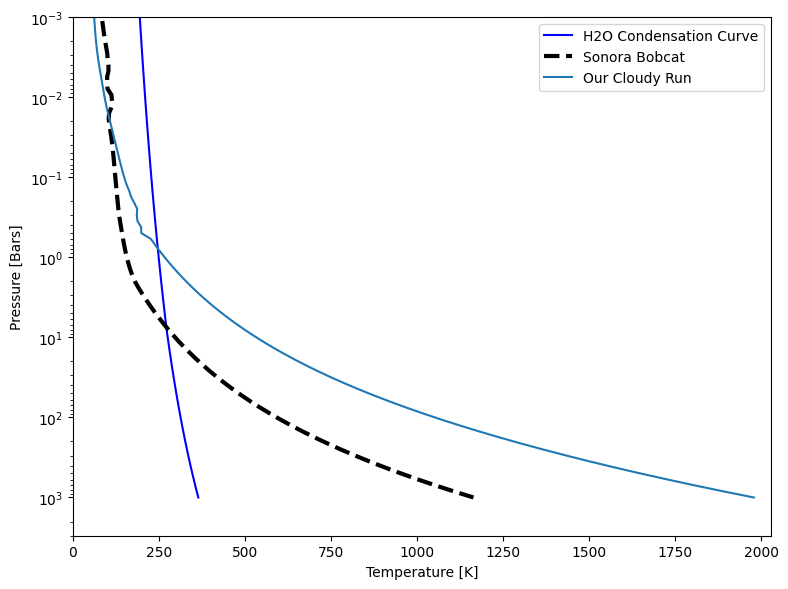

In [10]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.plot(h2o_cond_t,h2o_cond_p, 'b', label = 'H2O Condensation Curve')
plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")

plt.semilogy(out['temperature'],out['pressure'],label="Our Cloudy Run")

plt.legend()
plt.tight_layout()
plt.show()

Now you should be able to see a mostly smooth PT profile that's a little warmer than the cloud-free Sonora Bobcat profile. Even though it looks warmer, the actual effective temperature of the object is the same because the water cloud opacity blocks out some of the flux.

As you may know (or will find out) clouds are really difficult to converge models for especially with H2O clouds in cold regions for example. To learn more about common signs that you should look for to identify "bad" models, take a look at the [Common Climate Issues Notebook]()

## Looking at the Cloud Properties

If you look at the climate output now, you will notice a couple of new keys in the dictionary that helps you look at the cloud properties

In [11]:
out.keys()

dict_keys(['pressure', 'temperature', 'ptchem_df', 'dtdp', 'cvz_locs', 'flux_ir_attop', 'fnet/fnetir', 'converged', 'flux_balance', 'cld_df', 'virga_output', 'all_profiles', 'all_opd', 'all_kzz'])

`cld_df` and `virga_output` are the two important dictionary key outputs for cloudy runs. `cld_df` is in the format to be used to generate spectra.

In [12]:
out['cld_df']

,opd,w0,g0,pressure,wavenumber
0,5.158083e-31,1.0,0.787772,0.000195,37331.820150
1,4.823042e-31,1.0,0.789634,0.000195,34848.475344
2,4.406676e-31,1.0,0.789101,0.000195,32051.251233
3,4.041061e-31,1.0,0.787738,0.000195,29670.297718
4,3.707435e-31,1.0,0.785083,0.000195,27619.029732
...,...,...,...,...,...
17635,0.000000e+00,0.0,0.000000,918.620000,185.599999
17636,0.000000e+00,0.0,0.000000,918.620000,135.699994
17637,0.000000e+00,0.0,0.000000,918.620000,102.300002
17638,0.000000e+00,0.0,0.000000,918.620000,72.049997


`virga_output` can then be directly used with virga functions to easily visualize the properties as well. For more details about these individual properties and how to interpret them, please take a look at the [Analyzing Your Runs](https://natashabatalha.github.io/virga/notebooks/3_AnalyzingRuns.html) virga tutorial.

In [13]:
show(cldplt.all_optics_1d(out['virga_output'], wave_range=[1,2]))

In [14]:
show(cldplt.all_optics(out['virga_output']))

In [15]:
show(cldplt.opd_by_gas(out['virga_output']))

In [16]:
show(cldplt.condensate_mmr(out['virga_output']))

## Cloudy vs Clear Spectra

Now we can generate the spectrum for the cloudy run. This is exactly like how we generate any other thermal emission spectrum except this time we add in the cloud profile. (You may have done this before if you've tried to use a post-processed virga cloud)

In [17]:
opa_mon = jdi.opannection(wave_range=[0.3,15])

hi_res = jdi.inputs(calculation="browndwarf") # start a calculation
teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s
hi_res.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity

hi_res.atmosphere(df=out['ptchem_df'])

# now let's add the cloud optical properties
hi_res.clouds(df=out['cld_df'])

df_spec = hi_res.spectrum(opa_mon, calculation='thermal',full_output=True)

#converts from picaso default units (can also specify original unit if different from picaso via kwarg f_unit and xgrid_unit)
fluxnu= jdi.convert_flux_units(df_spec['wavenumber'], df_spec['thermal'], to_f_unit = 'erg*cm^(-2)*s^(-1)*Hz^(-1)')

df_spec['fluxnu'] = fluxnu
wno,fp = jdi.mean_regrid(df_spec['wavenumber'], fluxnu, R=200) #wavenumber, erg/cm2/s/Hz

In [18]:
jpi.show(jpi.spectrum(wno,fp,x_axis_type='log',y_axis_type='log'))

Now let's load in a Sonora Bobcat spectrum to compare what it looks like. This specific case has been included in this directory for ease of access but to compare other temperatures you will have to download the full [Sonora Bobcat](https://zenodo.org/records/5063476) set of models

In [19]:
teff = 200
grav = 1000

wave_bobcat,flux_bobcat = np.loadtxt(f"sp_t200g1000nc_m0.0",
                            usecols=[0,1],unpack=True, skiprows = 2)

In [20]:
# now let's regrid the spectra to R=200 to make sure the two spectra are on the same grid
wno_bobcat, fp_bobcat = jdi.mean_regrid(1e4/wave_bobcat,flux_bobcat,R=200)

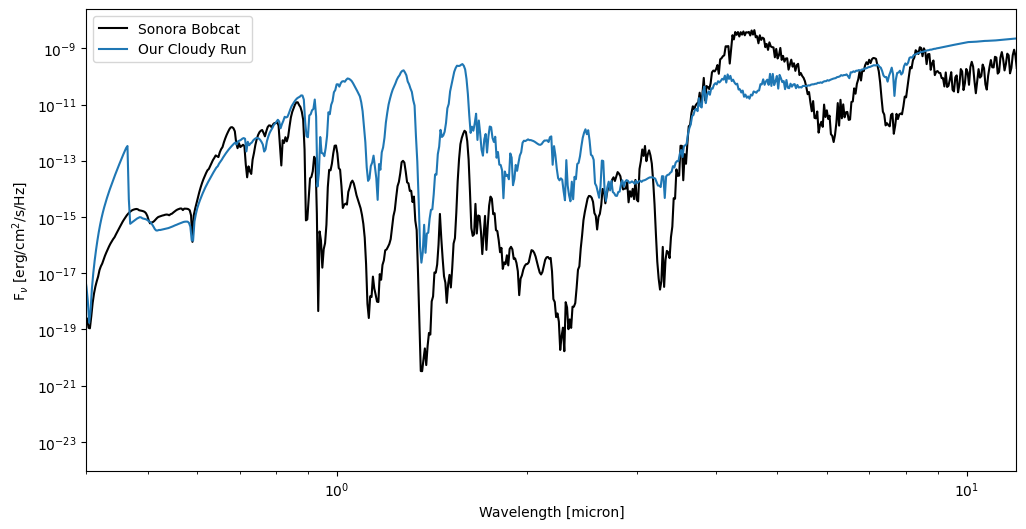

In [21]:
fig = plt.figure(figsize=(12,6))
plt.loglog(1e4/wno_bobcat,fp_bobcat, 'k', label = 'Sonora Bobcat')
plt.loglog(1e4/wno,fp, label = 'Our Cloudy Run')
plt.xlabel('Wavelength [micron]')
plt.ylabel('F$_\\nu$ [erg/cm$^2$/s/Hz]')
plt.xlim(0.4,12)
plt.legend()
plt.show()

So here you can see the large water cloud feature around 4-5 micron where the flux from this brown dwarf is being suppressed by the large water cloud opacity. Other water features can also be seen in other regions of the spectrum.

## Patchy Clouds

Clouds are hard...Sometimes they don't behave nicely with static 1-D climate models. To alleviate this or to represent the reality that clouds may not be uniformly covering the entire atmosphere, where we see variability in brown dwarfs, we can run patchy clouds! For more on this, you can  read [Morley et al. 2014a](https://ui.adsabs.harvard.edu/abs/2014ApJ...787...78M/abstract) and [Morley et al. 2014b](https://ui.adsabs.harvard.edu/abs/2014ApJ...789L..14M/abstract)

Here we're going to initiate a new climate calculation:

In [22]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db,method='preweighted') # grab your opacities

In [23]:
rcb_guess = 52 # top most level of guessed convective zone
# for the sake of time of this tutorial, I set it to 60 because I know where it should be in this case. In general for clouds it is better
# to start deeper in the atmosphere and work your way up. It just takes more time.

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

Here we include a few new parameters for patchy clouds
1. `do_holes` : (bool) Default = False. Turn on/off patchy clouds
2. `fhole` : (float) This is a value between 0 and 1. E.g. 0.9 represents 90% clear and 10% cloudy
3. `fthin_cld` : (float) This is a value between 0 and 1, it allows you to make the clear column have the slightest of clouds. 0 is completely clear, 1 is completely cloudy

Typically, it's easier to think about this using just fhole and ignoring fthin_cld. Use fthin_cld only if you're trying to really model complex systems with multiple cloud thicknesses or to build an intuition about clouds!

We can initialize the inputs just like before except we are making `do_holes = True` and `fhole = 0.5`

In [24]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)

cl_run.atmosphere(cold_trap=True)
cl_run.virga(condensates = ['H2O'],directory = virga_dir, mh=1,fsed = 8.0,
             do_holes = True, fhole = 0.5, fthin_cld = 0, latent_heat=True)

In [25]:
out_patchy = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=True)

SUMMARY
-------
Clouds: True
quench False
cold_trap True
vol_rainout False
no_ph3 False
Moist Adiabat: False
cold_trap=True; Adjusting cold trap
I am thinning the cloud with a fractional component: 0
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Doing clouds: Max TAUCLD diff is 6.2724446799522395  Tau tolerance is  1.254488935990448
I am thinning the cloud with a fractional component: 0


Iteration number  0 , min , max temp  74.30218438447434 1202.6718031448777 , flux balance  -0.13710135939499388
Iteration number  1 , min , max temp  73.70726691212101 1203.6257863680887 , flux balance  -0.1331153524871064


Iteration number  2 , min , max temp  73.11505853653564 1204.5667213841973 , flux balance  -0.12916601036457903
Iteration number  3 , min , max temp  72.52537730764448 1205.4955333745602 , flux balance  -0.12525291225749266
Iteration number  4 , min , max temp  71.93804673272842 1206.4128259786523 , flux balance  -0.12137566071552562
Iteration number  5 , min , max temp  71.35289653121924 1207.3187960989246 , flux balance  -0.1175338818952314
Iteration number  6 , min , max temp  70.76976290448424 1208.214109904087 , flux balance  -0.11372670684605124
Iteration number  7 , min , max temp  70.18848744058478 1209.098769870733 , flux balance  -0.10995400857703738
Iteration number  8 , min , max temp  69.6089187468655 1209.971659196641 , flux balance  -0.10621870896338154
Iteration number  9 , min , max temp  69.03090973254808 1210.8334274462482 , flux balance  -0.10251909520412485
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be eith

Doing clouds: Max TAUCLD diff is 6.114690778514314  Tau tolerance is  3.721384784390018
I am thinning the cloud with a fractional component: 0
Big iteration is  69.03090973254808 0


Iteration number  0 , min , max temp  68.4554389932632 1211.8653993810747 , flux balance  -0.11501110649749342
Iteration number  1 , min , max temp  67.88140088823363 1212.884418242111 , flux balance  -0.1108514711846468


Iteration number  2 , min , max temp  67.30866245879817 1213.890693902012 , flux balance  -0.10672908104102037
Iteration number  3 , min , max temp  66.73709865357216 1214.8844146452643 , flux balance  -0.10264368201711077
Iteration number  4 , min , max temp  66.16658831752507 1215.8655992322338 , flux balance  -0.09859543359458121
Iteration number  5 , min , max temp  65.59701558532872 1216.8346167096772 , flux balance  -0.09458364513084691
Iteration number  6 , min , max temp  65.0282700159623 1217.7916372845607 , flux balance  -0.09060811368885202
Iteration number  7 , min , max temp  64.46024523018077 1218.7363342214803 , flux balance  -0.08666866208419455
Iteration number  8 , min , max temp  63.89283912903621 1219.6693324214 , flux balance  -0.08276513139385219


Iteration number  9 , min , max temp  63.32595407567149 1220.590800359523 , flux balance  -0.07889738532072578
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.


Doing clouds: Max TAUCLD diff is 6.215271506618285  Tau tolerance is  6.170323261665344
I am thinning the cloud with a fractional component: 0
Big iteration is  63.32595407567149 1


Iteration number  0 , min , max temp  62.763853567201004 1221.7145584209907 , flux balance  -0.08917038748028047
Iteration number  1 , min , max temp  62.20222904271779 1222.8244688691807 , flux balance  -0.0847068914807076
Iteration number  2 , min , max temp  61.64099435408101 1223.9205524962692 , flux balance  -0.08028252858284844
Iteration number  3 , min , max temp  61.0800662102219 1225.0026412342772 , flux balance  -0.07589782255016896
Iteration number  4 , min , max temp  60.51936455205757 1226.0709270046468 , flux balance  -0.07155262451021822
Iteration number  5 , min , max temp  59.95881225017148 1227.1255971364176 , flux balance  -0.06724678996681746
Iteration number  6 , min , max temp  59.398331271175856 1228.1668360468425 , flux balance  -0.06298017282935423
Iteration number  7 , min , max temp  58.83784541435069 1229.1948273249716 , flux balance  -0.05875261772452646
Iteration number  8 , min , max temp  58.27727764664996 1230.2097561768792 , flux balance  -0.0545639507

Iteration number  9 , min , max temp  57.716550382819165 1231.2118124980457 , flux balance  -0.050413967662259064
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.


Doing clouds: Max TAUCLD diff is 6.059900469650472  Tau tolerance is  8.623355253059723
I am thinning the cloud with a fractional component: 0
Profile converged before itmx
cold_trap=True; Adjusting cold trap


I am thinning the cloud with a fractional component: 0
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 4.3299478388485735  Tau tolerance is  9.80436628466661
I am thinning the cloud with a fractional component: 0


Iteration number  0 , min , max temp  57.17013968692362 1232.6294690006018 , flux balance  -0.061540171660659435
Iteration number  1 , min , max temp  56.62359004587402 1234.0273009796501 , flux balance  -0.05604467852248679
Iteration number  2 , min , max temp  56.076827198404395 1235.4066971722086 , flux balance  -0.05059489205616319
Iteration number  3 , min , max temp  55.52976335847425 1236.768277609089 , flux balance  -0.04518972927575327
Iteration number  4 , min , max temp  54.98230324418652 1238.112467673951 , flux balance  -0.039827855231845774
Iteration number  5 , min , max temp  54.43433443015948 1239.4399707413493 , flux balance  -0.03450739442712567
Iteration number  6 , min , max temp  53.885713152569544 1240.7502100503825 , flux balance  -0.029225735005052714
Iterations exceeded it_max ! sorry 
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz p

Doing clouds: Max TAUCLD diff is 3.155057769325113  Tau tolerance is  9.689883397037859
I am thinning the cloud with a fractional component: 0
Big iteration is  53.885713152569544 0


Iteration number  0 , min , max temp  53.37371161255614 1242.7097704741723 , flux balance  -0.03134066245067745
Iteration number  1 , min , max temp  52.86075931369979 1244.652068824332 , flux balance  -0.023666107245119146
Iteration number  2 , min , max temp  52.346440345114225 1246.5799682708007 , flux balance  -0.015994994459660114
Iteration number  3 , min , max temp  51.8299131858802 1248.5037305105182 , flux balance  -0.008283771374409095
Iteration number  4 , min , max temp  51.318078641964824 1250.420376647092 , flux balance  -0.0005409145750061617
Iteration number  5 , min , max temp  51.29758631772011 1250.5444063027594 , flux balance  -3.685966201124857e-05
In t_start: Converged Solution in iterations  5
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 


Doing clouds: Max TAUCLD diff is 1.794638615309868  Tau tolerance is  9.265782359535436
I am thinning the cloud with a fractional component: 0
Profile converged before itmx
cold_trap=True; Adjusting cold trap


final [0, 52, 89, 0, 0, 0]
cold_trap=True; Adjusting cold trap
I am thinning the cloud with a fractional component: 0
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
I dont have fluxes, let me compute them


Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 1.5351273050408452  Tau tolerance is  8.618169686330392
I am thinning the cloud with a fractional component: 0


Iteration number  0 , min , max temp  51.76376800875963 1253.7809383394783 , flux balance  -0.000845216576105815
Iteration number  1 , min , max temp  51.783162507804846 1253.9812025711542 , flux balance  -5.7832428851633754e-05
In t_start: Converged Solution in iterations  1
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 2.01399620072684  Tau tolerance is  7.9083449851768535
I am thinning the cloud with a fractional component: 0
Big iteration is  51.783162507804846 0


Iteration number  0 , min , max temp  51.76658690823079 1255.3152181989026 , flux balance  -0.00036218511854914094
In t_start: Converged Solution in iterations  0
cold_trap=True; Adjusting cold trap
I am updating kzz. This could be either because clouds were requested (which always use self consistent kzz) or because self consistent kzz profiles were requested for chemistry.
Overwriting some Kz values to minimum value set by kz_min 
                     You can always turn off these warnings by setting verbose=False


Doing clouds: Max TAUCLD diff is 1.7869592808853554  Tau tolerance is  7.60756216217541
I am thinning the cloud with a fractional component: 0
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE
I am thinning the cloud with a fractional component: 0


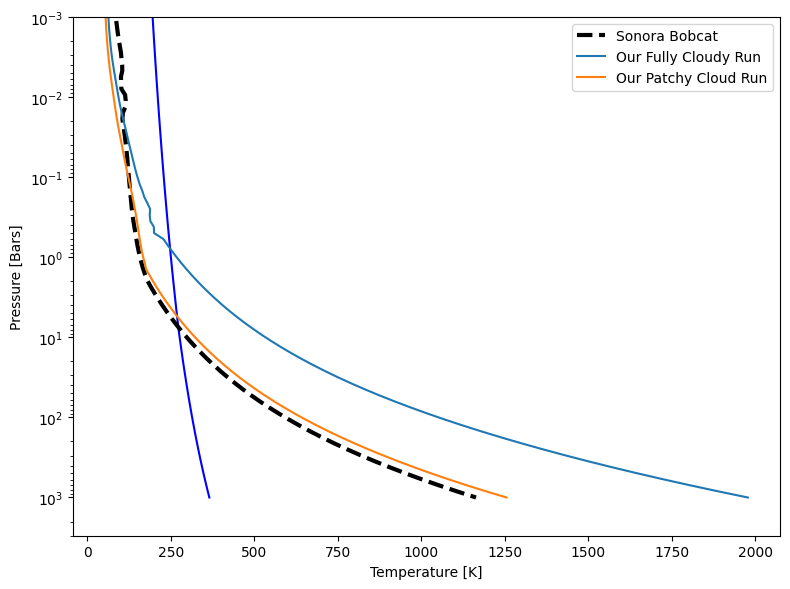

In [26]:
# now let's plot the results!
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
#plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.plot(h2o_cond_t,h2o_cond_p, 'b')#, label = 'H2O Condensation Curve')
plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")

plt.semilogy(out['temperature'],out['pressure'],label="Our Fully Cloudy Run")
plt.semilogy(out_patchy['temperature'],out_patchy['pressure'],label="Our Patchy Cloud Run")

plt.legend()
plt.tight_layout()
plt.show()

What you should notice here, because the patchy clouds reduces the amount of cloud opacity in the atmosphere, the PT profile is not shifted to be as warm as the fully cloudy model but is rather closer to the cloud-free Sonora Bobcat profile

In [27]:
opa_mon = jdi.opannection(wave_range=[0.3,15])

hi_res = jdi.inputs(calculation="browndwarf") # start a calculation
teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s
hi_res.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity

hi_res.atmosphere(df=out_patchy['ptchem_df'])

# now let's add the cloud optical properties, this time with arguments to make sure we take into consideration the patchy cloud parameters
hi_res.clouds(df=out_patchy['cld_df'], do_holes=True, fhole = 0.3, fthin_cld=0)

df_spec = hi_res.spectrum(opa_mon, calculation='thermal',full_output=True)
#converts from picaso default units (can also specify original unit if different from picaso via kwarg f_unit and xgrid_unit)
fluxnu= jdi.convert_flux_units(df_spec['wavenumber'], df_spec['thermal'], to_f_unit = 'erg*cm^(-2)*s^(-1)*Hz^(-1)')

df_spec['fluxnu'] = fluxnu
wno_patchy,fp_patchy= jdi.mean_regrid(df_spec['wavenumber'], fluxnu, R=200) #wavenumber, erg/cm2/s/Hz

I am thinning the cloud with a fractional component: 0


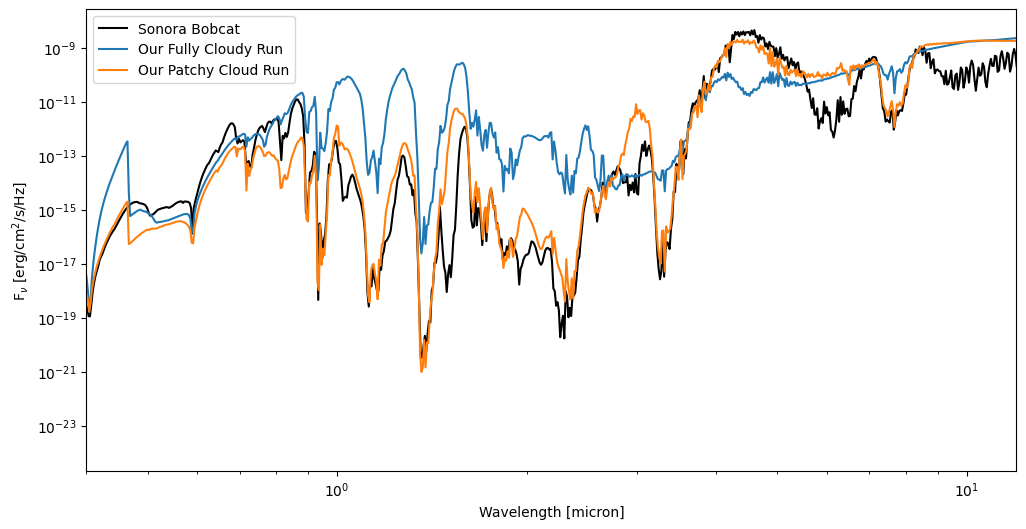

In [28]:
fig = plt.figure(figsize=(12,6))
plt.loglog(1e4/wno_bobcat,fp_bobcat, 'k', label = 'Sonora Bobcat')
plt.loglog(1e4/wno,fp, label = 'Our Fully Cloudy Run')
plt.loglog(1e4/wno_patchy,fp_patchy, label = 'Our Patchy Cloud Run')
plt.xlabel('Wavelength [micron]')
plt.ylabel('F$_\\nu$ [erg/cm$^2$/s/Hz]')
plt.xlim(0.4,12)
plt.legend()
plt.show()

In comparison to the fully cloudy model, you can see that even at 50% cloudy that the water cloud feature at 4-5 micron isn't as distinct as the 100% cloudy model. You can, however, see in the other H2O band windows that the 50% cloudy model finds itself, as we expect, between a fully clear model, and a fully cloudy model.